In [255]:
import numpy as np
import pandas as pd
import os
import sys


In [2]:
dat_dir = "/Users/akshay/Desktop/A4_B/SVM/"
os.listdir(dat_dir)

['test_public.csv', 'test_labels.txt', 'train.csv']

In [451]:
train_data=pd.read_csv(dat_dir+"train.csv",header=None)
test_data = pd.read_csv(dat_dir+"test_public.csv",header=None)

In [444]:
def normalise(data):
    data = data/255
    return data.iloc[:15000,:] , data.iloc[15000:,:]

In [452]:
# data = pd.concat([train_data,test_data],axis=0)
X_train , X_test = normalise(train_data.iloc[:,:-1])
Y_train ,Y_test = train_data.iloc[:15000,-1] , train_data.iloc[15000:,-1]
train_data = pd.concat([X_train,Y_train],axis=1)

In [453]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(15000, 784) (15000,) (5000, 784) (5000,)


In [454]:
train_dic = {}
for i,c in enumerate(train_data.iloc[:,-1]):
    if(c not in train_dic.keys()):
        train_dic[c]=[]
    train_dic[c].append(train_data.iloc[i,:].values)    

In [455]:
def solve(iteration,lambda_value,data):
    w = np.zeros(784)
    b=0
    for i in range(1,iteration+1):
        eta = 1/(lambda_value*i)
        k = np.random.randint(0,data.shape[0])
        y = data[k,-1]
        x = data[k,:-1]
        val = y*(np.dot(w,x)+b)
        if(val<1):
            w = (1-eta*lambda_value)*w + eta*y*x
            b = b + eta*y
        else:
            w = (1-eta*lambda_value)*w
    return w , b       

In [456]:
w = [[None for i in range(45)] for i in range(45)]
b = [[None  for i in range(45)] for i in range(45)]
result = []
for i in range(10):
    for j in range(i+1,10):
        print(i,j)
        d = np.array(train_dic[i]+train_dic[j])
        d[:,-1] = np.where(d[:,-1]==i,-1,1)
        np.random.shuffle(d)
        w[i][j] , b[i][j] = solve(100000,0.1,d[:,:])

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2 3
2 4
2 5
2 6
2 7
2 8
2 9
3 4
3 5
3 6
3 7
3 8
3 9
4 5
4 6
4 7
4 8
4 9
5 6
5 7
5 8
5 9
6 7
6 8
6 9
7 8
7 9
8 9


In [438]:
def predict(X,Y):
    Y_pred = []
    for i in range(10):
        for j in range(i+1,10):
            y_pred = np.dot(X , w[i][j].reshape(784,1))+b[i][j]
            y_pred = np.where(y_pred<=0,i,j)
            Y_pred.append(y_pred)
    y = []
    for i in range(X.shape[0]):
        print(i,end="\r",flush=True)
        y.append(np.argmax(np.bincount(np.array(Y_pred)[:,i].reshape(45))))
    return np.sum(Y==np.array(y))/X.shape[0] 
    

In [457]:
predict(X_train,Y_train)

0.8878666666666667

In [458]:
predict(X_test,Y_test)

0.8864

In [427]:
# np.bincount(np.array(Y_pred)[:,1])


In [434]:
# np.array(y).reshape(20000,1)==Y_train
Y_train.shape

(20000,)

0.8831

0.9677777777777778


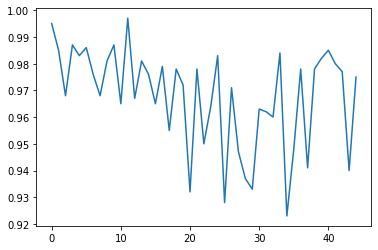

In [373]:
np.savetxt

0.9692888888888891


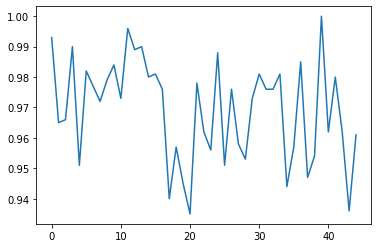

In [363]:
plt.plot(result)
print(sum(result)/45)

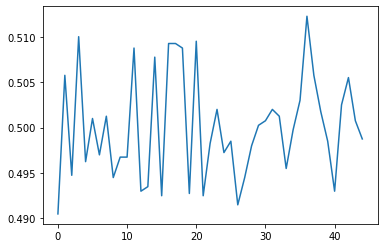

In [297]:
plt.plot(result)

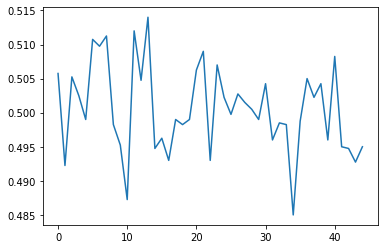

In [283]:
plt.plot(result)

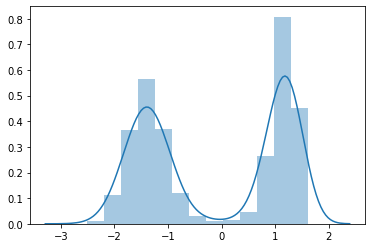

In [233]:
import seaborn as sns


In [459]:
Y_pred = np.loadtxt("SVM/out.txt")
Y_test = np.loadtxt("SVM/test_labels.txt")

In [461]:
np.sum(Y_pred==Y_test)/4000

0.863

In [467]:
a = [1,2,3,4]
b = [2,3,5,6]

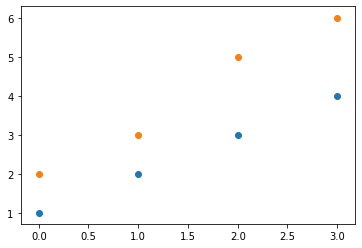

In [469]:

# plt.show()
plt.savefig("image")

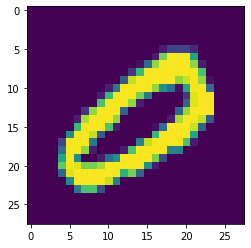

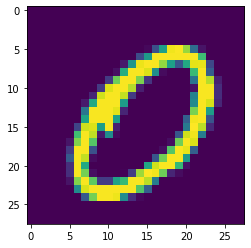

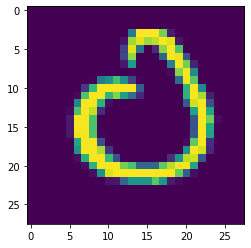

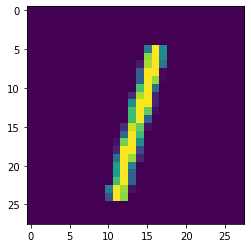

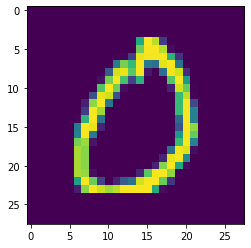

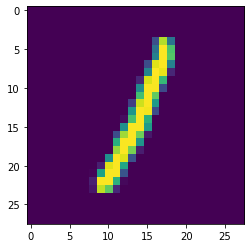

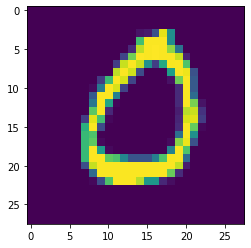

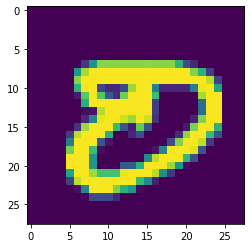

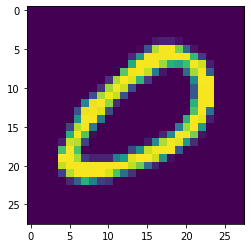

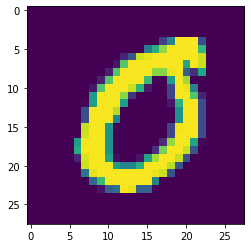

In [179]:
for i in range(0,10):
    plt.imshow(d[i][:-1].reshape(28,28))
    plt.show()

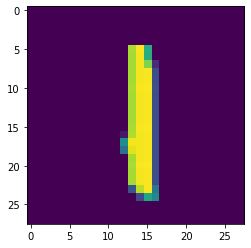

In [49]:
plt.imshow(train_dic[1][2][:-1].reshape(28,28))